# PANDAS AVANÇADO
---

# CARREGANDO OS DADOS
---

## Configurações do projeto

### Importando pacotes

In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.__version__

'1.4.1'

### Opções de configuração

[Documentação](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html)

In [3]:
pd.get_option("display.max_rows")

60

In [4]:
pd.get_option("display.max_columns")

20

[Opções disponíveis](https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html#available-options)

In [5]:
np.arange(10000)

array([   0,    1,    2, ..., 9997, 9998, 9999])

In [6]:
df = pd.DataFrame(np.arange(10000).reshape(100,100))
df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
1,100,101,102,103,104,105,106,107,108,109,...,190,191,192,193,194,195,196,197,198,199
2,200,201,202,203,204,205,206,207,208,209,...,290,291,292,293,294,295,296,297,298,299
3,300,301,302,303,304,305,306,307,308,309,...,390,391,392,393,394,395,396,397,398,399
4,400,401,402,403,404,405,406,407,408,409,...,490,491,492,493,494,495,496,497,498,499
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,9500,9501,9502,9503,9504,9505,9506,9507,9508,9509,...,9590,9591,9592,9593,9594,9595,9596,9597,9598,9599
96,9600,9601,9602,9603,9604,9605,9606,9607,9608,9609,...,9690,9691,9692,9693,9694,9695,9696,9697,9698,9699
97,9700,9701,9702,9703,9704,9705,9706,9707,9708,9709,...,9790,9791,9792,9793,9794,9795,9796,9797,9798,9799
98,9800,9801,9802,9803,9804,9805,9806,9807,9808,9809,...,9890,9891,9892,9893,9894,9895,9896,9897,9898,9899


In [7]:
#É interessante porém deixar o navegador lerdo e a guia não responde mais :/

#pd.set_option('display.max_rows', 1000)
#pd.set_option('display.max_columns', 100)

In [8]:
# Interessante para saber qual é a descrição dos métodos que nós utilizamos.

#pd.describe_option('display.max_rows')
#pd.describe_option('display.max_columns')

# Carregando dados

### Arquivos JSON - `read_json`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_json.html)

## JSON

JSON (**J**ava**S**cript **O**bject **N**otation - Notação de Objetos JavaScript) é uma formatação leve de troca de dados. Para seres humanos, é fácil de ler e escrever. Para máquinas, é fácil de interpretar e gerar. Está baseado em um subconjunto da linguagem de programação JavaScript, Standard ECMA-262 3a Edição - Dezembro - 1999. JSON é em formato texto e completamente independente de linguagem, pois usa convenções que são familiares às linguagens C e familiares, incluindo C++, C#, Java, JavaScript, Perl, Python e muitas outras. Estas propriedades fazem com que JSON seja um formato ideal de troca de dados.

[fonte](https://www.json.org/json-pt.html)

[Online JSON Viewer](http://jsonviewer.stack.hu/)

In [9]:
data_json = '{"A": [1, 2, 3, 4] ,"B": [5, 6, 7, 8], "C": [9, 10, 11, 12]}' 
data_json

'{"A": [1, 2, 3, 4] ,"B": [5, 6, 7, 8], "C": [9, 10, 11, 12]}'

In [10]:
dados = pd.read_json(
    path_or_buf=data_json,
    orient = 'columns'
)

dados

,A,B,C
0,1,5,9
1,2,6,10
2,3,7,11
3,4,8,12


Por padrão cada chave do dicionário é uma coluna, mas caso coloque o parâmetro do orient como 'index', cada chave do dicionário será uma linha.

In [11]:
dados = pd.read_json(
    path_or_buf=data_json,
    orient = 'index'
)

dados

,0,1,2,3
A,1,2,3,4
B,5,6,7,8
C,9,10,11,12


In [12]:
dados = pd.read_json(
    path_or_buf='./dados/realestates.json',
    orient = 'columns'
)

dados

,normal,highlights
output,{'listings': [{'imovel': {'tipos': {'proprieda...,{'listings': [{'imovel': {'tipos': {'proprieda...


### Arquivos EXCEL - `read_excel`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html)

In [13]:
bairros = pd.read_excel(
    io='./dados/bairros.xlsx',
    sheet_name='Preço médio por tipo',
    usecols="C:E",
    header = 2,
    index_col = [0,1],
    names = ['bairros','tipo','valor_m2_bairro']
)
bairros

valor_m2_bairro
bairros       tipo                             
São Cristóvão Casa                        13793
              Apartamento                  6306
              Cobertura                   11695
              Consultório                  6991
              Imóvel Comercial            19633
...                                         ...
Vista Alegre  Cobertura                   16567
              Consultório                  5812
              Imóvel Comercial            12895
              Loja                         6182
              Sala Comercial               3377

[1127 rows x 1 columns]

# TRANSFORMANDO E TRATANDO OS DADOS
---

## Transformando dados no formato JSON para uma tabela

In [14]:
dados

,normal,highlights
output,{'listings': [{'imovel': {'tipos': {'proprieda...,{'listings': [{'imovel': {'tipos': {'proprieda...


### `json_normalize`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.json_normalize.html)

In [15]:
dados_normal = pd.json_normalize(data = dados.normal)
dados_normal

,listings
0,"[{'imovel': {'tipos': {'propriedade': 'Casa'},..."


In [16]:
#dados_normal['listings'].iloc[0]

In [17]:
type(dados_normal['listings'].iloc[0])

list

In [18]:
len(dados_normal['listings'].iloc[0])

50

In [19]:
dados_normal_listings = pd.json_normalize(data=dados_normal['listings'].iloc[0], sep='_')
dados_normal_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"['Área de Serviço', 'Terraço', 'Churrasqueira'...","['Churrasqueira', 'Salão de Jogos', 'Sauna', '...","['Próximo a Escola Particular', 'Próximo ao Me...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,['Sauna'],"['Elevador', 'Playground', 'Salão de Festas', ...","['Próximo ao Shopping', 'Próximo a Áreas de La...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"['Acessibilidade', 'Área de Serviço', 'Sauna',...","['Sauna', 'Playground', 'Quadra Poliesportiva'...",['Próximo a Escola Particular'],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"['Vista Panorâmica', 'Piscina', 'Sauna', 'Clos...","['Quadra Poliesportiva', 'Aceita Pet', 'Playgr...","['Próximo a Farmácia', 'Próximo a Academia', '...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,['Armários Planejados'],"['Quadra Poliesportiva', 'Porteiro 24 Horas', ...","['Próximo a Centro Empresarial', 'Próximo a Ár...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
5,Casa,Vila Isabel,Point,"[0, 0]",2,164,"['Mobiliado', 'Varanda', 'Closet', 'Churrasque...","['Aceita Pet', 'Quadra Poliesportiva', 'Playgr...","['Próximo a Centro Empresarial', 'Próximo a Es...",Padrão,Lançamento,280000.0,0.0,583.0,188.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
6,Casa,Andaraí,Point,"[-43.252201188, -22.9282608539]",1,68,"['Churrasqueira', 'Gás Encanado', 'Cozinha Ame...","['Sauna', 'Sistema de Incêndio', 'Estacionamen...","['Próximo ao Metrô', 'Próximo ao Shopping', 'P...",Destaque,Usado,300000.0,0.0,350.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
7,Apartamento,Copacabana,Point,"[-43.1749613, -22.964604]",1,110,"['Quarto/WC Empregada', 'Gás Encanado', 'Sauna...","['Piscina', 'Comércio/Serviços no Condomínio',...","['Próximo a Escola Particular', 'Próximo a Com...",Premium,Usado,950000.0,0.0,800.0,120.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
8,Consultório,Recreio dos Bandeirantes,Point,"[-43.453754, -23.0102127]",4,214,"['Acessibilidade', 'Mobiliado', 'Churrasqueira...","['Aceita Pet', 'Salão de Festas', 'Sauna', 'De...","['Próximo a Mercado', 'Próximo a Farmácia']",Super Destaque,Usado,1390000.0,0.0,750.0,3282.0,"Amplo imóvel para venda com 4 quartos, sendo 1..."
9,Casa,Recreio dos Bandeirantes,Point,"[-43.5129166, -23.0241139]",1,82,"['Área de Serviço', 'Terraço', 'Ambientes Inte...","['Piscina', 'Salão de Festas', 'Estacionamento...","['Próximo ao Metrô', 'Próximo a Comércio Diver...",Padrão,Usado,439000.0,0.0,620.0,1.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [20]:
dados_normal_listings = pd.json_normalize(data=dados_normal['listings'].iloc[0], 
                                          sep='_', max_level=1)
dados_normal_listings

,imovel_tipos,imovel_endereco,imovel_vagasGaragem,imovel_area,imovel_caracteristicas,anuncio_tipos,anuncio_valores,anuncio_descricao
0,{'propriedade': 'Casa'},"{'bairro': 'Barra da Tijuca', 'localizacao': {...",4,279,"{'propriedade': '['Área de Serviço', 'Terraço'...","{'publicacao': 'Padrão', 'listagem': 'Lançamen...","{'venda': 2400000.0, 'aluguel': 0.0, 'condomin...","Amplo imóvel para venda com 3 quartos, sendo 1..."
1,{'propriedade': 'Apartamento'},"{'bairro': 'Campo Grande', 'localizacao': {'ty...",1,60,"{'propriedade': '['Sauna']', 'condominio': '['...","{'publicacao': 'Padrão', 'listagem': 'Usado'}","{'venda': 200000.0, 'aluguel': 0.0, 'condomini...","Amplo imóvel para venda com 2 quartos, sendo 0..."
2,{'propriedade': 'Cobertura'},"{'bairro': 'Barra da Tijuca', 'localizacao': {...",2,380,"{'propriedade': '['Acessibilidade', 'Área de S...","{'publicacao': 'Premium', 'listagem': 'Usado'}","{'venda': 4400000.0, 'aluguel': 0.0, 'condomin...","Amplo imóvel para venda com 5 quartos, sendo 4..."
3,{'propriedade': 'Cobertura'},"{'bairro': 'Barra da Tijuca', 'localizacao': {...",1,73,"{'propriedade': '['Vista Panorâmica', 'Piscina...","{'publicacao': 'Padrão', 'listagem': 'Usado'}","{'venda': 1100000.0, 'aluguel': 0.0, 'condomin...","Amplo imóvel para venda com 2 quartos, sendo 1..."
4,{'propriedade': 'Sala Comercial'},"{'bairro': 'Glória', 'localizacao': {'type': '...",1,32,"{'propriedade': '['Armários Planejados']', 'co...","{'publicacao': 'Padrão', 'listagem': 'Usado'}","{'venda': 260000.0, 'aluguel': 0.0, 'condomini...","Amplo imóvel para venda com 0 quartos, sendo 0..."
5,{'propriedade': 'Casa'},"{'bairro': 'Vila Isabel', 'localizacao': {'typ...",2,164,"{'propriedade': '['Mobiliado', 'Varanda', 'Clo...","{'publicacao': 'Padrão', 'listagem': 'Lançamen...","{'venda': 280000.0, 'aluguel': 0.0, 'condomini...","Amplo imóvel para venda com 1 quartos, sendo 0..."
6,{'propriedade': 'Casa'},"{'bairro': 'Andaraí', 'localizacao': {'type': ...",1,68,"{'propriedade': '['Churrasqueira', 'Gás Encana...","{'publicacao': 'Destaque', 'listagem': 'Usado'}","{'venda': 300000.0, 'aluguel': 0.0, 'condomini...","Amplo imóvel para venda com 2 quartos, sendo 0..."
7,{'propriedade': 'Apartamento'},"{'bairro': 'Copacabana', 'localizacao': {'type...",1,110,"{'propriedade': '['Quarto/WC Empregada', 'Gás ...","{'publicacao': 'Premium', 'listagem': 'Usado'}","{'venda': 950000.0, 'aluguel': 0.0, 'condomini...","Amplo imóvel para venda com 3 quartos, sendo 1..."
8,{'propriedade': 'Consultório'},"{'bairro': 'Recreio dos Bandeirantes', 'locali...",4,214,"{'propriedade': '['Acessibilidade', 'Mobiliado...","{'publicacao': 'Super Destaque', 'listagem': '...","{'venda': 1390000.0, 'aluguel': 0.0, 'condomin...","Amplo imóvel para venda com 4 quartos, sendo 1..."
9,{'propriedade': 'Casa'},"{'bairro': 'Recreio dos Bandeirantes', 'locali...",1,82,"{'propriedade': '['Área de Serviço', 'Terraço'...","{'publicacao': 'Padrão', 'listagem': 'Usado'}","{'venda': 439000.0, 'aluguel': 0.0, 'condomini...","Amplo imóvel para venda com 3 quartos, sendo 1..."


In [21]:
dados_normal_listings = pd.json_normalize(data=dados.normal, sep='_',
                                          record_path=['listings'])
dados_normal_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"['Área de Serviço', 'Terraço', 'Churrasqueira'...","['Churrasqueira', 'Salão de Jogos', 'Sauna', '...","['Próximo a Escola Particular', 'Próximo ao Me...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,['Sauna'],"['Elevador', 'Playground', 'Salão de Festas', ...","['Próximo ao Shopping', 'Próximo a Áreas de La...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"['Acessibilidade', 'Área de Serviço', 'Sauna',...","['Sauna', 'Playground', 'Quadra Poliesportiva'...",['Próximo a Escola Particular'],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"['Vista Panorâmica', 'Piscina', 'Sauna', 'Clos...","['Quadra Poliesportiva', 'Aceita Pet', 'Playgr...","['Próximo a Farmácia', 'Próximo a Academia', '...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,['Armários Planejados'],"['Quadra Poliesportiva', 'Porteiro 24 Horas', ...","['Próximo a Centro Empresarial', 'Próximo a Ár...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
5,Casa,Vila Isabel,Point,"[0, 0]",2,164,"['Mobiliado', 'Varanda', 'Closet', 'Churrasque...","['Aceita Pet', 'Quadra Poliesportiva', 'Playgr...","['Próximo a Centro Empresarial', 'Próximo a Es...",Padrão,Lançamento,280000.0,0.0,583.0,188.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
6,Casa,Andaraí,Point,"[-43.252201188, -22.9282608539]",1,68,"['Churrasqueira', 'Gás Encanado', 'Cozinha Ame...","['Sauna', 'Sistema de Incêndio', 'Estacionamen...","['Próximo ao Metrô', 'Próximo ao Shopping', 'P...",Destaque,Usado,300000.0,0.0,350.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
7,Apartamento,Copacabana,Point,"[-43.1749613, -22.964604]",1,110,"['Quarto/WC Empregada', 'Gás Encanado', 'Sauna...","['Piscina', 'Comércio/Serviços no Condomínio',...","['Próximo a Escola Particular', 'Próximo a Com...",Premium,Usado,950000.0,0.0,800.0,120.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
8,Consultório,Recreio dos Bandeirantes,Point,"[-43.453754, -23.0102127]",4,214,"['Acessibilidade', 'Mobiliado', 'Churrasqueira...","['Aceita Pet', 'Salão de Festas', 'Sauna', 'De...","['Próximo a Mercado', 'Próximo a Farmácia']",Super Destaque,Usado,1390000.0,0.0,750.0,3282.0,"Amplo imóvel para venda com 4 quartos, sendo 1..."
9,Casa,Recreio dos Bandeirantes,Point,"[-43.5129166, -23.0241139]",1,82,"['Área de Serviço', 'Terraço', 'Ambientes Inte...","['Piscina', 'Salão de Festas', 'Estacionamento...","['Próximo ao Metrô', 'Próximo a Comércio Diver...",Padrão,Usado,439000.0,0.0,620.0,1.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [22]:
dados_highlights_listings = pd.json_normalize(data=dados.highlights, sep='_', record_path=['listings'])
dados_highlights_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Engenho Novo,Point,"[-43.2634918, -22.8971768]",0,0,"['Sauna', 'Terraço', 'Acessibilidade', 'Mobili...","['Estacionamento Coberto', 'Estacionamento Vis...","['Próximo a Serviços de Saúde', 'Próximo ao Sh...",Padrão,Usado,195772.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
1,Cobertura,Vargem Grande,Point,"[-43.4907917, -22.988122]",1,61,[],"['Estacionamento Visitantes', 'Estacionamento ...","['Próximo ao Metrô', 'Próximo a Praia', 'Próxi...",Destaque,Usado,305000.0,0.0,667.0,162.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Imóvel Comercial,Ribeira,Point,"[-43.1690005, -22.8239272]",4,180,"['Vista Panorâmica', 'Acessibilidade', 'Área d...","['Segurança Interna', 'Salão de Festas', 'Acad...","['Próximo a Restaurante', 'Próximo a Praia', '...",Padrão,Usado,1050000.0,0.0,0.0,315.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
3,Apartamento,Praça Seca,Point,"[0, 0]",1,50,"['Sauna', 'Quarto/WC Empregada']","['Salão de Jogos', 'Segurança Interna', 'Estac...","['Próximo ao Shopping', 'Próximo a Escola Part...",Padrão,Usado,250000.0,0.0,350.0,150.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
4,Apartamento,Honório Gurgel,Point,"[-43.3614243, -22.8416031]",0,148,"['Terraço', 'Piscina', 'Gás Encanado', 'Acessi...","['Sauna', 'Bicicletário', 'Academia', 'Serviço...","['Próximo a Serviços de Saúde', 'Próximo a Far...",Destaque,Lançamento,165000.0,0.0,270.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
5,Apartamento,Barra da Tijuca,Point,"[-43.3245375, -23.006984]",1,79,"['Terraço', 'Acessibilidade', 'Armários Planej...","['Salão de Festas', 'Estacionamento Visitantes...","['Próximo a Mercado', 'Próximo a Parques e Áre...",Premium,Usado,900000.0,0.0,1400.0,180.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
6,Consultório,Tijuca,Point,"[-43.2558939, -22.9444082]",1,126,"['Armários Planejados', 'Closet', 'Gás Encanad...","['Bicicletário', 'Salão de Jogos', 'Segurança ...","['Próximo a Praia', 'Próximo a Serviços de Saú...",Padrão,Usado,630000.0,0.0,0.0,1500.0,"Amplo imóvel para venda com 2 quartos, sendo 2..."
7,Apartamento,Recreio dos Bandeirantes,Point,"[-43.480981, -23.0160348]",1,126,"['Sauna', 'Cozinha Americana', 'Terraço', 'Gás...","['Estacionamento Visitantes', 'Salão de Festas...","['Próximo a Escola Pública', 'Próximo ao Metrô...",Padrão,Usado,475000.0,0.0,920.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
8,Apartamento,Tijuca,Point,"[-43.2266348, -22.9220052]",0,0,"['Ambientes Integrados', 'Varanda', 'Terraço',...","['Elevador', 'Acessibilidade', 'Estacionamento...",[],Padrão,Usado,0.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
9,Apartamento,Lagoa,Point,"[-43.2112318, -22.9625433]",1,56,"['Sauna', 'Piscina', 'Cozinha Americana', 'Vis...","['Quadra Poliesportiva', 'Bicicletário', 'Pisc...","['Próximo a Farmácia', 'Próximo a Áreas de Laz...",Padrão,Usado,1200000.0,0.0,1608.0,3284.0,"Amplo imóvel para venda com 1 quartos, sendo 1..."


## Trabalhando com dados textuais

### Transformando *strings* em listas do Python

In [23]:
dados_normal_listings.head(2)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"['Área de Serviço', 'Terraço', 'Churrasqueira'...","['Churrasqueira', 'Salão de Jogos', 'Sauna', '...","['Próximo a Escola Particular', 'Próximo ao Me...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,['Sauna'],"['Elevador', 'Playground', 'Salão de Festas', ...","['Próximo ao Shopping', 'Próximo a Áreas de La...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."


In [24]:
lista_str = dados_normal_listings.loc[0,'imovel_caracteristicas_propriedade']
lista_str

"['Área de Serviço', 'Terraço', 'Churrasqueira', 'Quarto/WC Empregada', 'Sauna', 'Varanda', 'Gás Encanado', 'Closet', 'Piscina', 'Mobiliado', 'Armários Planejados', 'Acessibilidade']"

In [25]:
type(lista_str)

str

In [26]:
lista_str[0]

'['

#### Métodos de *strings*

[Documentação](https://docs.python.org/3.6/library/stdtypes.html#string-methods)

In [27]:
lista_str[1:-1]

"'Área de Serviço', 'Terraço', 'Churrasqueira', 'Quarto/WC Empregada', 'Sauna', 'Varanda', 'Gás Encanado', 'Closet', 'Piscina', 'Mobiliado', 'Armários Planejados', 'Acessibilidade'"

In [28]:
#ou
lista_str.strip('[]')

"'Área de Serviço', 'Terraço', 'Churrasqueira', 'Quarto/WC Empregada', 'Sauna', 'Varanda', 'Gás Encanado', 'Closet', 'Piscina', 'Mobiliado', 'Armários Planejados', 'Acessibilidade'"

In [29]:
lista = lista_str[1:-1].replace("'","").split(", ")
lista

['Área de Serviço',
 'Terraço',
 'Churrasqueira',
 'Quarto/WC Empregada',
 'Sauna',
 'Varanda',
 'Gás Encanado',
 'Closet',
 'Piscina',
 'Mobiliado',
 'Armários Planejados',
 'Acessibilidade']

In [30]:
type(lista)

list

In [31]:
texto = dados_normal_listings.loc[:, 'imovel_caracteristicas_propriedade']
texto

0     ['Área de Serviço', 'Terraço', 'Churrasqueira'...
1                                             ['Sauna']
2     ['Acessibilidade', 'Área de Serviço', 'Sauna',...
3     ['Vista Panorâmica', 'Piscina', 'Sauna', 'Clos...
4                               ['Armários Planejados']
5     ['Mobiliado', 'Varanda', 'Closet', 'Churrasque...
6     ['Churrasqueira', 'Gás Encanado', 'Cozinha Ame...
7     ['Quarto/WC Empregada', 'Gás Encanado', 'Sauna...
8     ['Acessibilidade', 'Mobiliado', 'Churrasqueira...
9     ['Área de Serviço', 'Terraço', 'Ambientes Inte...
10    ['Closet', 'Ambientes Integrados', 'Área de Se...
11                                                   []
12    ['Piscina', 'Quarto/WC Empregada', 'Gás Encana...
13    ['Sauna', 'Terraço', 'Closet', 'Gás Encanado',...
14                                                   []
15    ['Quarto/WC Empregada', 'Varanda', 'Piscina', ...
16    ['Vista Panorâmica', 'Sauna', 'Área de Serviço...
17    ['Quarto/WC Empregada', 'Churrasqueira', '

#### `str`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.html)

In [32]:
texto.str

In [33]:
texto.str[1:-1]

0     'Área de Serviço', 'Terraço', 'Churrasqueira',...
1                                               'Sauna'
2     'Acessibilidade', 'Área de Serviço', 'Sauna', ...
3     'Vista Panorâmica', 'Piscina', 'Sauna', 'Close...
4                                 'Armários Planejados'
5     'Mobiliado', 'Varanda', 'Closet', 'Churrasquei...
6     'Churrasqueira', 'Gás Encanado', 'Cozinha Amer...
7     'Quarto/WC Empregada', 'Gás Encanado', 'Sauna'...
8     'Acessibilidade', 'Mobiliado', 'Churrasqueira'...
9     'Área de Serviço', 'Terraço', 'Ambientes Integ...
10    'Closet', 'Ambientes Integrados', 'Área de Ser...
11                                                     
12    'Piscina', 'Quarto/WC Empregada', 'Gás Encanad...
13    'Sauna', 'Terraço', 'Closet', 'Gás Encanado', ...
14                                                     
15    'Quarto/WC Empregada', 'Varanda', 'Piscina', '...
16    'Vista Panorâmica', 'Sauna', 'Área de Serviço'...
17      'Quarto/WC Empregada', 'Churrasqueira', 

In [34]:
texto.str[1:-1].str.replace("'","")

0     Área de Serviço, Terraço, Churrasqueira, Quart...
1                                                 Sauna
2     Acessibilidade, Área de Serviço, Sauna, Ambien...
3     Vista Panorâmica, Piscina, Sauna, Closet, Mobi...
4                                   Armários Planejados
5     Mobiliado, Varanda, Closet, Churrasqueira, Amb...
6     Churrasqueira, Gás Encanado, Cozinha Americana...
7     Quarto/WC Empregada, Gás Encanado, Sauna, Vara...
8     Acessibilidade, Mobiliado, Churrasqueira, Pisc...
9     Área de Serviço, Terraço, Ambientes Integrados...
10    Closet, Ambientes Integrados, Área de Serviço,...
11                                                     
12    Piscina, Quarto/WC Empregada, Gás Encanado, Mo...
13    Sauna, Terraço, Closet, Gás Encanado, Vista Pa...
14                                                     
15    Quarto/WC Empregada, Varanda, Piscina, Sauna, ...
16    Vista Panorâmica, Sauna, Área de Serviço, Pisc...
17            Quarto/WC Empregada, Churrasqueira

In [35]:
texto = texto.str[1:-1].str.replace("'","").str.split(", ")
texto

0     [Área de Serviço, Terraço, Churrasqueira, Quar...
1                                               [Sauna]
2     [Acessibilidade, Área de Serviço, Sauna, Ambie...
3     [Vista Panorâmica, Piscina, Sauna, Closet, Mob...
4                                 [Armários Planejados]
5     [Mobiliado, Varanda, Closet, Churrasqueira, Am...
6     [Churrasqueira, Gás Encanado, Cozinha American...
7     [Quarto/WC Empregada, Gás Encanado, Sauna, Var...
8     [Acessibilidade, Mobiliado, Churrasqueira, Pis...
9     [Área de Serviço, Terraço, Ambientes Integrado...
10    [Closet, Ambientes Integrados, Área de Serviço...
11                                                   []
12    [Piscina, Quarto/WC Empregada, Gás Encanado, M...
13    [Sauna, Terraço, Closet, Gás Encanado, Vista P...
14                                                   []
15    [Quarto/WC Empregada, Varanda, Piscina, Sauna,...
16    [Vista Panorâmica, Sauna, Área de Serviço, Pis...
17          [Quarto/WC Empregada, Churrasqueira,

In [36]:
type(texto)

pandas.core.series.Series

#### `filter`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.filter.html)

In [37]:
columns = dados_normal_listings.filter(like='imovel_caracteristicas').columns

for column in columns:
    dados_normal_listings[column] = dados_normal_listings[column].str[1:-1].str.replace("'","").str.split(", ")
    dados_highlights_listings[column] = dados_highlights_listings[column].str[1:-1].str.replace("'","").str.split(", ")


In [38]:
dados_normal_listings.loc[0,'imovel_caracteristicas_propriedade'][0]

'Área de Serviço'

# COMBINANDO CONJUNTOS DE DADOS
---

In [39]:
dados_normal_listings.head(3)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."


In [40]:
dados_highlights_listings.head(3)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Engenho Novo,Point,"[-43.2634918, -22.8971768]",0,0,"[Sauna, Terraço, Acessibilidade, Mobiliado, Vi...","[Estacionamento Coberto, Estacionamento Visita...","[Próximo a Serviços de Saúde, Próximo ao Shopp...",Padrão,Usado,195772.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
1,Cobertura,Vargem Grande,Point,"[-43.4907917, -22.988122]",1,61,[],"[Estacionamento Visitantes, Estacionamento Cob...","[Próximo ao Metrô, Próximo a Praia, Próximo a ...",Destaque,Usado,305000.0,0.0,667.0,162.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Imóvel Comercial,Ribeira,Point,"[-43.1690005, -22.8239272]",4,180,"[Vista Panorâmica, Acessibilidade, Área de Ser...","[Segurança Interna, Salão de Festas, Academia,...","[Próximo a Restaurante, Próximo a Praia, Próxi...",Padrão,Usado,1050000.0,0.0,0.0,315.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


## Empilhando *DataFrames*

### `append`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html)

In [41]:
dados_normal_listings.columns == dados_highlights_listings.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True])

In [42]:
dados_normal_listings.append(dados_highlights_listings)

/tmp/ipykernel_175/72009710.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados_normal_listings.append(dados_highlights_listings)


,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, Mob...","[Quadra Poliesportiva, Aceita Pet, Playground,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, Elev...","[Próximo a Centro Empresarial, Próximo a Áreas...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pisci...","[Elevador, Salão de Festas, Porteiro 24 Horas,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
16,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
17,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empreg...","[Bicicletário, Sistema de Incêndio, Segurança ...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
18,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Integ...","[Playground, Depósito Privativo, Academia, Qua...","[Próximo a Praia, Próximo a Serviços de Saúde,...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [43]:
dados_normal_listings.append(dados_highlights_listings, ignore_index = True)

/tmp/ipykernel_175/2585758680.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados_normal_listings.append(dados_highlights_listings, ignore_index = True)


,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, Mob...","[Quadra Poliesportiva, Aceita Pet, Playground,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, Elev...","[Próximo a Centro Empresarial, Próximo a Áreas...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pisci...","[Elevador, Salão de Festas, Porteiro 24 Horas,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
67,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empreg...","[Bicicletário, Sistema de Incêndio, Segurança ...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
68,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Integ...","[Playground, Depósito Privativo, Academia, Qua...","[Próximo a Praia, Próximo a Serviços de Saúde,...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


In [44]:
dados_listings = dados_normal_listings.append(dados_highlights_listings, ignore_index = True)
dados_listings

/tmp/ipykernel_175/3350472253.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dados_listings = dados_normal_listings.append(dados_highlights_listings, ignore_index = True)


,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, Mob...","[Quadra Poliesportiva, Aceita Pet, Playground,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, Elev...","[Próximo a Centro Empresarial, Próximo a Áreas...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pisci...","[Elevador, Salão de Festas, Porteiro 24 Horas,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
67,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empreg...","[Bicicletário, Sistema de Incêndio, Segurança ...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
68,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Integ...","[Playground, Depósito Privativo, Academia, Qua...","[Próximo a Praia, Próximo a Serviços de Saúde,...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


### `concat`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html)

In [45]:
dados_listings = pd.concat([dados_normal_listings, dados_highlights_listings], ignore_index=True)
dados_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4..."
3,Cobertura,Barra da Tijuca,Point,"[-43.3548121, -23.0097423]",1,73,"[Vista Panorâmica, Piscina, Sauna, Closet, Mob...","[Quadra Poliesportiva, Aceita Pet, Playground,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1100000.0,0.0,1300.0,364.0,"Amplo imóvel para venda com 2 quartos, sendo 1..."
4,Sala Comercial,Glória,Point,"[-43.1779703, -22.9174894]",1,32,[Armários Planejados],"[Quadra Poliesportiva, Porteiro 24 Horas, Elev...","[Próximo a Centro Empresarial, Próximo a Áreas...",Padrão,Usado,260000.0,0.0,450.0,800.0,"Amplo imóvel para venda com 0 quartos, sendo 0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,Apartamento,Copacabana,Point,"[-43.1943902, -22.9816847]",1,216,"[Cozinha Americana, Quarto/WC Empregada, Pisci...","[Elevador, Salão de Festas, Porteiro 24 Horas,...","[Próximo a Farmácia, Próximo a Academia, Próxi...",Padrão,Usado,1800000.0,0.0,2000.0,2300.0,"Amplo imóvel para venda com 4 quartos, sendo 2..."
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
67,Casa,Copacabana,Point,"[-43.1951842, -22.9818646]",0,25,"[Closet, Armários Planejados, Quarto/WC Empreg...","[Bicicletário, Sistema de Incêndio, Segurança ...",[],Destaque,Usado,350000.0,0.0,290.0,182.0,"Amplo imóvel para venda com 1 quartos, sendo 0..."
68,Sala Comercial,Cachambi,Point,"[-43.2781994, -22.8917611]",2,138,"[Gás Encanado, Acessibilidade, Ambientes Integ...","[Playground, Depósito Privativo, Academia, Qua...","[Próximo a Praia, Próximo a Serviços de Saúde,...",Premium,Usado,619000.0,0.0,506.0,1404.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."


## Combinando *DataFrames* a partir de uma chave de ligação

In [46]:
dados_listings.head(2)

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1..."
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0..."


In [47]:
bairros

valor_m2_bairro
bairros       tipo                             
São Cristóvão Casa                        13793
              Apartamento                  6306
              Cobertura                   11695
              Consultório                  6991
              Imóvel Comercial            19633
...                                         ...
Vista Alegre  Cobertura                   16567
              Consultório                  5812
              Imóvel Comercial            12895
              Loja                         6182
              Sala Comercial               3377

[1127 rows x 1 columns]

### Tratando a variável de ligação

#### Selecionando a variável de ligação nos dois *DataFrames*

In [48]:
bairros_amostra = dados_listings['imovel_endereco_bairro']
bairros_amostra

0     Barra da Tijuca
1        Campo Grande
2     Barra da Tijuca
3     Barra da Tijuca
4              Glória
           ...       
65         Copacabana
66             Leblon
67         Copacabana
68           Cachambi
69             Tijuca
Name: imovel_endereco_bairro, Length: 70, dtype: object

[Documentação: `get_level_values`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.get_level_values.html)

In [49]:
bairros_todos = bairros.index.get_level_values('bairros')
bairros_todos

Index(['São Cristóvão', 'São Cristóvão', 'São Cristóvão', 'São Cristóvão',
       'São Cristóvão', 'São Cristóvão', 'São Cristóvão', 'Benfica', 'Benfica',
       'Benfica',
       ...
       'Vila Kosmos', 'Vila Kosmos', 'Vila Kosmos', 'Vista Alegre',
       'Vista Alegre', 'Vista Alegre', 'Vista Alegre', 'Vista Alegre',
       'Vista Alegre', 'Vista Alegre'],
      dtype='object', name='bairros', length=1127)

#### Identificando e eliminando valores duplicados - `nunique` e `unique`

[Documentação: `nunique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.nunique.html)

[Documentação: `unique`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.unique.html)

In [50]:
bairros_amostra.shape

(70,)

In [51]:
bairros_amostra.nunique()

30

In [52]:
bairros_amostra.unique()

array(['Barra da Tijuca', 'Campo Grande', 'Glória', 'Vila Isabel',
       'Andaraí', 'Copacabana', 'Recreio dos Bandeirantes', 'Tijuca',
       'Méier', 'Ipanema', 'Paciência', 'Freguesia (Jacarepaguá)',
       'Vargem Pequena', 'Pechincha', 'Freguesia', 'Botafogo',
       'Vila da Penha', 'Jacarepaguá', 'Laranjeiras', 'Ribeira', 'Lapa',
       'Rocha', 'Flamengo', 'Engenho Novo', 'Vargem Grande', 'Praça Seca',
       'Honório Gurgel', 'Lagoa', 'Leblon', 'Cachambi'], dtype=object)

In [53]:
type(bairros_amostra.unique())

numpy.ndarray

In [54]:
bairros_amostra = pd.Series(bairros_amostra.unique())
bairros_amostra

0              Barra da Tijuca
1                 Campo Grande
2                       Glória
3                  Vila Isabel
4                      Andaraí
5                   Copacabana
6     Recreio dos Bandeirantes
7                       Tijuca
8                        Méier
9                      Ipanema
10                   Paciência
11     Freguesia (Jacarepaguá)
12              Vargem Pequena
13                   Pechincha
14                   Freguesia
15                    Botafogo
16               Vila da Penha
17                 Jacarepaguá
18                 Laranjeiras
19                     Ribeira
20                        Lapa
21                       Rocha
22                    Flamengo
23                Engenho Novo
24               Vargem Grande
25                  Praça Seca
26              Honório Gurgel
27                       Lagoa
28                      Leblon
29                    Cachambi
dtype: object

---

In [55]:
bairros_todos.shape

(1127,)

In [56]:
bairros_todos.nunique()

161

In [57]:
bairros_todos = pd.Series(bairros_todos.unique())
bairros_todos

0            São Cristóvão
1                  Benfica
2                     Caju
3                  Catumbi
4                   Centro
              ...         
156    Vicente de Carvalho
157          Vigário Geral
158          Vila da Penha
159            Vila Kosmos
160           Vista Alegre
Name: bairros, Length: 161, dtype: object

#### Verificando se existe correspondência entre as variáveis de ligação

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.isin.html)

In [58]:
bairros_amostra.isin(bairros_todos)

0      True
1      True
2      True
3      True
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
24     True
25     True
26     True
27     True
28     True
29     True
dtype: bool

In [59]:
bairros.loc['Freguesia']

,valor_m2_bairro
tipo,
Casa,15156
Apartamento,7930
Cobertura,15391
Consultório,4479
Imóvel Comercial,16730
Loja,7095
Sala Comercial,8666


In [60]:
bairros.loc['Jacarepaguá']

,valor_m2_bairro
tipo,
Casa,19073
Apartamento,8574
Cobertura,16140
Consultório,7554
Imóvel Comercial,10599
Loja,7305
Sala Comercial,5023


#### Ajustando os valores

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.replace.html)

In [61]:
dados_listings['imovel_endereco_bairro'].replace('Freguesia (Jacarepaguá)', 'Freguesia', inplace = True)

In [62]:
bairros_amostra = pd.Series(dados_listings['imovel_endereco_bairro'].unique())
bairros_amostra

0              Barra da Tijuca
1                 Campo Grande
2                       Glória
3                  Vila Isabel
4                      Andaraí
5                   Copacabana
6     Recreio dos Bandeirantes
7                       Tijuca
8                        Méier
9                      Ipanema
10                   Paciência
11                   Freguesia
12              Vargem Pequena
13                   Pechincha
14                    Botafogo
15               Vila da Penha
16                 Jacarepaguá
17                 Laranjeiras
18                     Ribeira
19                        Lapa
20                       Rocha
21                    Flamengo
22                Engenho Novo
23               Vargem Grande
24                  Praça Seca
25              Honório Gurgel
26                       Lagoa
27                      Leblon
28                    Cachambi
dtype: object

In [63]:
bairros_amostra.isin(bairros_todos)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
15    True
16    True
17    True
18    True
19    True
20    True
21    True
22    True
23    True
24    True
25    True
26    True
27    True
28    True
dtype: bool

### Combinando os *DataFrames*

#### `merge`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.merge.html)

```
pandas.merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes='_x', '_y', copy=True, indicator=False, validate=None)
```

**Parameters**

- **left**: DataFrame


- **right**: DataFrame
    

- **how**: {‘left’, ‘right’, ‘outer’, ‘inner’}, *default* ‘inner’

        Tipo de junção que será realizada.

        - left: usa apenas as chaves do DataFrame especificado no parâmetro left.

        - right: usa apenas as chaves do DataFrame especificado no parâmetro right.

        - outer: considera todos os registros dos DataFrames especificados nos parâmetros left e right, isto é, faz a união das chaves.

        - inner: considera apenas a interseção das chaves dos DataFrames especificados nos parâmetros left e right.
    

- **on**: label ou list

        Nomes das colunas ou dos índices que serão utilizados na junção. Estes devem ser encontrados em ambos os DataFrames.
        

- **left_on**: label ou list, or array-like

        Nomes das colunas ou dos índices do DataFrame especificado em left que serão utilizados na junção.
        

- **right_on**: label or list, or array-like

        Nomes das colunas ou dos índices do DataFrame especificado em right que serão utilizados na junção.
    

- **left_index**: bool, *default False*

        Indica se o índice do DataFrame especificado no parâmetro left deve ser utilizado como chave de junção.
        

- **right_index**: bool, *default False*

        Indica se o índice do DataFrame especificado no parâmetro right deve ser utilizado como chave de junção.

In [64]:
dados_listings = pd.merge(
    left = dados_listings,
    right = bairros,
    left_on = ['imovel_endereco_bairro', 'imovel_tipos_propriedade'],
    right_index = True
)
dados_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairro
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835
47,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armários...","[Churrasqueira, Depósito Privativo, Quadra Pol...","[Próximo a Restaurante, Próximo a Comércio Div...",Super Destaque,Usado,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1...",12835
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425
16,Apartamento,Campo Grande,Point,"[-43.1728965, -22.9068467]",0,40,"[Vista Panorâmica, Sauna, Área de Serviço, Pis...","[Bicicletário, Comércio/Serviços no Condomínio...","[Próximo a Escola Particular, Próximo a Praia,...",Padrão,Usado,700000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4...",12585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Apartamento,Vila Isabel,Point,"[-43.2508337, -22.9167328]",1,70,"[Gás Encanado, Quarto/WC Empregada, Terraço, A...",[Academia],"[Próximo a Mercado, Próximo a Praia, Próximo a...",Padrão,Usado,370000.0,0.0,500.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",5964
63,Cobertura,Méier,Point,"[-43.279874, -22.894531]",0,0,[],"[Playground, Elevador, Salão de Festas, Estaci...","[Próximo a Restaurante, Próximo a Mercado, Pró...",Padrão,Usado,350000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0...",17199
64,Cobertura,Méier,Point,"[0, 0]",0,62,"[Terraço, Área de Serviço, Sauna, Churrasqueir...","[Acessibilidade, Bicicletário, Aceita Pet, Chu...","[Próximo ao Metrô, Próximo a Restaurante, Próx...",Padrão,Usado,265000.0,0.0,220.0,0.0,"Amplo imóvel para venda com 3 quartos, sendo 0...",17199
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",6388


# ADICIONANDO INFORMAÇÕES
---

## Criando as colunas `quartos`, `suites` e `banheiros`

In [65]:
dados_listings['anuncio_descricao'].values[:10]

array(['Amplo imóvel para venda com 3 quartos, sendo 1 suítes, e 2 banheiros no total.',
       'Amplo imóvel para venda com 4 quartos, sendo 1 suítes, e 2 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 5 quartos, sendo 4 suítes, e 5 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 1 suítes, e 2 banheiros no total.',
       'Amplo imóvel para venda com 0 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 1 quartos, sendo 0 suítes, e 0 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.',
       'Amplo imóvel para venda com 2 quartos, sendo 0 suítes, e 1 banheiros no total.'],
      dtype=object)

### `str.extractall`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.str.extractall.html)

In [66]:
configuracao = dados_listings['anuncio_descricao'].str.extractall('(\d+)')
configuracao.head(9)

0
   match   
0  0      3
   1      1
   2      2
47 0      4
   1      1
   2      2
1  0      2
   1      0
   2      1

### `unstack`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)

In [67]:
configuracao = configuracao.unstack().rename(columns={0:'quartos', 1:'suites',2:'banheiros'})
configuracao

quartos                 
match quartos suites banheiros
0           3      1         2
1           2      0         1
2           5      4         5
3           2      1         2
4           0      0         1
..        ...    ...       ...
65          4      2         3
66          3      1         2
67          1      0         1
68          3      1         2
69          3      1         2

[70 rows x 3 columns]

In [68]:
configuracao.columns

MultiIndex([('quartos',   'quartos'),
            ('quartos',    'suites'),
            ('quartos', 'banheiros')],
           names=[None, 'match'])

### `droplevel`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.droplevel.html)

In [69]:
configuracao = configuracao.droplevel(0, axis=1)

In [70]:
configuracao

match,quartos,suites,banheiros
0,3,1,2
1,2,0,1
2,5,4,5
3,2,1,2
4,0,0,1
...,...,...,...
65,4,2,3
66,3,1,2
67,1,0,1
68,3,1,2


In [71]:
dados_listings = pd.merge(dados_listings, configuracao,
                          left_index=True, right_index = True)
dados_listings

,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,anuncio_tipos_publicacao,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairro,quartos,suites,banheiros
0,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",Padrão,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835,3,1,2
47,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armários...","[Churrasqueira, Depósito Privativo, Quadra Pol...","[Próximo a Restaurante, Próximo a Comércio Div...",Super Destaque,Usado,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1...",12835,4,1,2
1,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",Padrão,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1
16,Apartamento,Campo Grande,Point,"[-43.1728965, -22.9068467]",0,40,"[Vista Panorâmica, Sauna, Área de Serviço, Pis...","[Bicicletário, Comércio/Serviços no Condomínio...","[Próximo a Escola Particular, Próximo a Praia,...",Padrão,Usado,700000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1
2,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],Premium,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4...",12585,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Apartamento,Vila Isabel,Point,"[-43.2508337, -22.9167328]",1,70,"[Gás Encanado, Quarto/WC Empregada, Terraço, A...",[Academia],"[Próximo a Mercado, Próximo a Praia, Próximo a...",Padrão,Usado,370000.0,0.0,500.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",5964,2,0,1
63,Cobertura,Méier,Point,"[-43.279874, -22.894531]",0,0,[],"[Playground, Elevador, Salão de Festas, Estaci...","[Próximo a Restaurante, Próximo a Mercado, Pró...",Padrão,Usado,350000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0...",17199,0,0,1
64,Cobertura,Méier,Point,"[0, 0]",0,62,"[Terraço, Área de Serviço, Sauna, Churrasqueir...","[Acessibilidade, Bicicletário, Aceita Pet, Chu...","[Próximo ao Metrô, Próximo a Restaurante, Próx...",Padrão,Usado,265000.0,0.0,220.0,0.0,"Amplo imóvel para venda com 3 quartos, sendo 0...",17199,3,0,1
66,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",Premium,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",6388,3,1,2


## Criando novas classificações

### Com dados categóricos - `map`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html)

In [72]:
tipo_uso = {
    'Apartamento': 'Residencial',
    'Casa': 'Residencial',
    'Cobertura': 'Residencial',
    'Consultório': 'Comercial',
    'Imóvel Comercial': 'Comercial',
    'Loja': 'Comercial',
    'Sala Comercial': 'Comercial'
}

In [73]:
imovel_tipos_uso = dados_listings.imovel_tipos_propriedade.map(tipo_uso)

#### `insert`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html)

In [74]:
dados_listings.insert(loc=0, 
                      column='imovel_tipos_uso', 
                      value=imovel_tipos_uso)

In [75]:
dados_listings

,imovel_tipos_uso,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,...,anuncio_tipos_listagem,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairro,quartos,suites,banheiros
0,Residencial,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",...,Lançamento,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835,3,1,2
47,Residencial,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armários...","[Churrasqueira, Depósito Privativo, Quadra Pol...","[Próximo a Restaurante, Próximo a Comércio Div...",...,Usado,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1...",12835,4,1,2
1,Residencial,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",...,Usado,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1
16,Residencial,Apartamento,Campo Grande,Point,"[-43.1728965, -22.9068467]",0,40,"[Vista Panorâmica, Sauna, Área de Serviço, Pis...","[Bicicletário, Comércio/Serviços no Condomínio...","[Próximo a Escola Particular, Próximo a Praia,...",...,Usado,700000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1
2,Residencial,Cobertura,Barra da Tijuca,Point,"[-43.3037186, -22.9951304]",2,380,"[Acessibilidade, Área de Serviço, Sauna, Ambie...","[Sauna, Playground, Quadra Poliesportiva, Salã...",[Próximo a Escola Particular],...,Usado,4400000.0,0.0,1200.0,850.0,"Amplo imóvel para venda com 5 quartos, sendo 4...",12585,5,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,Residencial,Apartamento,Vila Isabel,Point,"[-43.2508337, -22.9167328]",1,70,"[Gás Encanado, Quarto/WC Empregada, Terraço, A...",[Academia],"[Próximo a Mercado, Próximo a Praia, Próximo a...",...,Usado,370000.0,0.0,500.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",5964,2,0,1
63,Residencial,Cobertura,Méier,Point,"[-43.279874, -22.894531]",0,0,[],"[Playground, Elevador, Salão de Festas, Estaci...","[Próximo a Restaurante, Próximo a Mercado, Pró...",...,Usado,350000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 0 quartos, sendo 0...",17199,0,0,1
64,Residencial,Cobertura,Méier,Point,"[0, 0]",0,62,"[Terraço, Área de Serviço, Sauna, Churrasqueir...","[Acessibilidade, Bicicletário, Aceita Pet, Chu...","[Próximo ao Metrô, Próximo a Restaurante, Próx...",...,Usado,265000.0,0.0,220.0,0.0,"Amplo imóvel para venda com 3 quartos, sendo 0...",17199,3,0,1
66,Residencial,Apartamento,Leblon,Point,"[-43.2253114, -22.9843603]",1,218,"[Piscina, Gás Encanado]","[Academia, Aceita Pet, Sistema de Incêndio, Bi...","[Próximo a Comércio Diversos, Próximo a Centro...",...,Usado,4500000.0,0.0,3600.0,7000.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",6388,3,1,2


In [76]:
dados_listings['imovel_tipos_uso'].value_counts()

Residencial    60
Comercial      10
Name: imovel_tipos_uso, dtype: int64

### Com dados numéricos - `cut`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.cut.html)

#### Utilizando classes fixas

In [77]:
valor_minimo = dados_listings['anuncio_valores_venda'].min()
valor_minimo

0.0

In [78]:
valor_maximo = dados_listings['anuncio_valores_venda'].max()
valor_maximo

24000000.0

In [79]:
rotulos = ['Popular','Padrão', 'Alto Padrão']

In [80]:
pd.cut(x=dados_listings['anuncio_valores_venda'], bins=3, 
       labels=rotulos)

0     Popular
47    Popular
1     Popular
16    Popular
2     Popular
       ...   
60    Popular
63    Popular
64    Popular
66    Popular
68    Popular
Name: anuncio_valores_venda, Length: 70, dtype: category
Categories (3, object): ['Popular' < 'Padrão' < 'Alto Padrão']

#### Utilizando classes personalizadas

In [81]:
classes = [valor_minimo, 400000, 2000000, valor_maximo]

In [82]:
pd.cut(x=dados_listings['anuncio_valores_venda'],
       bins=classes, labels=rotulos, include_lowest=True)

0     Alto Padrão
47    Alto Padrão
1         Popular
16         Padrão
2     Alto Padrão
         ...     
60        Popular
63        Popular
64        Popular
66    Alto Padrão
68         Padrão
Name: anuncio_valores_venda, Length: 70, dtype: category
Categories (3, object): ['Popular' < 'Padrão' < 'Alto Padrão']

In [83]:
dados_listings['classe_valor'] = pd.cut(x=dados_listings['anuncio_valores_venda'],
       bins=classes, labels=rotulos, include_lowest=True)

In [84]:
dados_listings.head(3)

,imovel_tipos_uso,imovel_tipos_propriedade,imovel_endereco_bairro,imovel_endereco_localizacao_type,imovel_endereco_localizacao_coordinates,imovel_vagasGaragem,imovel_area,imovel_caracteristicas_propriedade,imovel_caracteristicas_condominio,imovel_caracteristicas_entorno,...,anuncio_valores_venda,anuncio_valores_aluguel,anuncio_valores_condominio,anuncio_valores_iptu,anuncio_descricao,valor_m2_bairro,quartos,suites,banheiros,classe_valor
0,Residencial,Casa,Barra da Tijuca,Point,"[-43.3039086, -23.0139692]",4,279,"[Área de Serviço, Terraço, Churrasqueira, Quar...","[Churrasqueira, Salão de Jogos, Sauna, Estacio...","[Próximo a Escola Particular, Próximo ao Metrô...",...,2400000.0,0.0,790.0,5700.0,"Amplo imóvel para venda com 3 quartos, sendo 1...",12835,3,1,2,Alto Padrão
47,Residencial,Casa,Barra da Tijuca,Point,"[-43.3413206, -22.99961]",0,370,"[Acessibilidade, Quarto/WC Empregada, Armários...","[Churrasqueira, Depósito Privativo, Quadra Pol...","[Próximo a Restaurante, Próximo a Comércio Div...",...,3200000.0,0.0,2520.0,7600.0,"Amplo imóvel para venda com 4 quartos, sendo 1...",12835,4,1,2,Alto Padrão
1,Residencial,Apartamento,Campo Grande,Point,"[0, 0]",1,60,[Sauna],"[Elevador, Playground, Salão de Festas, Sistem...","[Próximo ao Shopping, Próximo a Áreas de Lazer...",...,200000.0,0.0,0.0,0.0,"Amplo imóvel para venda com 2 quartos, sendo 0...",6425,2,0,1,Popular


## Novas colunas derivadas das informações existentes

### Valor por m²

In [85]:
dados_listings['valor_m2'] = dados_listings['anuncio_valores_venda'] / dados_listings['imovel_area']

In [86]:
dados_listings[['anuncio_valores_venda', 'imovel_area', 'valor_m2']].iloc[16:19]

,anuncio_valores_venda,imovel_area,valor_m2
8,1390000.0,214,6495.327103
13,370583.0,0,inf
24,1600000.0,300,5333.333333


#### `apply`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html)

In [87]:
valor_m2 = lambda data: data['anuncio_valores_venda']/data['imovel_area'] if data['imovel_area'] !=0 else 0

In [88]:
dados_listings['valor_m2'] = dados_listings.apply(valor_m2, axis=1)

In [89]:
dados_listings[['anuncio_valores_venda', 'imovel_area', 'valor_m2']].iloc[16:19]

,anuncio_valores_venda,imovel_area,valor_m2
8,1390000.0,214,6495.327103
13,370583.0,0,0.000000
24,1600000.0,300,5333.333333


### Piscina?

In [90]:
dados_listings['Piscina'] = dados_listings['imovel_caracteristicas_condominio'].apply(lambda x: 'Piscina' in x)
dados_listings[['imovel_caracteristicas_condominio','Piscina']].head()

,imovel_caracteristicas_condominio,Piscina
0,"[Churrasqueira, Salão de Jogos, Sauna, Estacio...",False
47,"[Churrasqueira, Depósito Privativo, Quadra Pol...",True
1,"[Elevador, Playground, Salão de Festas, Sistem...",False
16,"[Bicicletário, Comércio/Serviços no Condomínio...",False
2,"[Sauna, Playground, Quadra Poliesportiva, Salã...",True


# TABULAÇÕES E SUMARIZAÇÕES
---

## Agrupamentos

### `aggregate`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html)

In [91]:
dados_listings[['anuncio_valores_venda', 'anuncio_valores_condominio','anuncio_valores_iptu']].aggregate(['sum','mean','std'])

,anuncio_valores_venda,anuncio_valores_condominio,anuncio_valores_iptu
sum,1.002803e+08,47515.000000,55128.000000
mean,1.432575e+06,678.785714,787.542857
std,3.025357e+06,817.130130,1521.565886


In [92]:
dados_listings[['anuncio_valores_venda', 'anuncio_valores_condominio','anuncio_valores_iptu']].agg(['sum','mean','std'])

,anuncio_valores_venda,anuncio_valores_condominio,anuncio_valores_iptu
sum,1.002803e+08,47515.000000,55128.000000
mean,1.432575e+06,678.785714,787.542857
std,3.025357e+06,817.130130,1521.565886


### `groupby`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html)

In [93]:
grupamento = dados_listings[['imovel_tipos_propriedade','valor_m2']].groupby(by='imovel_tipos_propriedade')
grupamento

In [94]:
grupamento.mean().round()

,valor_m2
imovel_tipos_propriedade,
Apartamento,7330.0
Casa,8120.0
Cobertura,7449.0
Consultório,4207.0
Imóvel Comercial,6548.0
Sala Comercial,7028.0


In [95]:
grupamento.agg(['min','mean','max','std'])

valor_m2                                        
                                  min         mean           max          std
imovel_tipos_propriedade                                                     
Apartamento                  0.000000  7329.849069  21428.571429  5669.681417
Casa                         0.000000  8120.400349  21666.666667  6895.343358
Cobertura                    0.000000  7448.626295  15068.493151  5444.015893
Consultório                  0.000000  4207.165109   6495.327103  2877.079862
Imóvel Comercial          5833.333333  6548.245614   7263.157895  1011.038643
Sala Comercial            3000.000000  7027.626812  12500.000000  4236.163588

In [96]:
grupamento = dados_listings[['imovel_tipos_propriedade','classe_valor','valor_m2']].groupby(by=['imovel_tipos_propriedade','classe_valor'])

In [97]:
grupamento.mean().round(2)

valor_m2
imovel_tipos_propriedade classe_valor          
Apartamento              Popular        3008.46
                         Padrão         8188.81
                         Alto Padrão   16294.41
Casa                     Popular        3571.30
                         Padrão         9458.75
                         Alto Padrão   11331.15
Cobertura                Popular        3373.24
                         Padrão        15068.49
                         Alto Padrão   11789.47
Consultório              Popular           0.00
                         Padrão         5609.55
                         Alto Padrão        NaN
Imóvel Comercial         Popular            NaN
                         Padrão         5833.33
                         Alto Padrão    7263.16
Sala Comercial           Popular        5562.50
                         Padrão         8492.75
                         Alto Padrão        NaN

In [98]:
grupamento.agg(['min','mean','max','std'])

valor_m2                \
                                                min          mean   
imovel_tipos_propriedade classe_valor                               
Apartamento              Popular           0.000000   3008.459035   
                         Padrão            0.000000   8188.808020   
                         Alto Padrão   13241.025641  16294.409159   
Casa                     Popular           0.000000   3571.297397   
                         Padrão         2439.880952   9458.753114   
                         Alto Padrão     103.896104  11331.150536   
Cobertura                Popular           0.000000   3373.235887   
                         Padrão        15068.493151  15068.493151   
                         Alto Padrão   11578.947368  11789.473684   
Consultório              Popular           0.000000      0.000000   
                         Padrão         5000.000000   5609.553479   
                         Alto Padrão            NaN           NaN   
Imóvel Comercial         Popular                NaN           NaN   
                         Padrão         5833.333333   5833.333333   
                         Alto Padrão    7263.157895   7263.157895   
Sala Comercial           Popular        3000.000000   5562.500000   
                         Padrão         4485.507246   8492.753623   
                         Alto Padrão            NaN           NaN   

                                                                  
                                                max          std  
imovel_tipos_propriedade classe_valor                             
Apartamento              Popular        6349.206349  2489.129498  
                         Padrão        21428.571429  5104.396472  
                         Alto Padrão   20642.201835  3866.648881  
Casa                     Popular       14000.000000  5048.330479  
                         Padrão        21666.666667  6859.381332  
                         Alto Padrão   20833.333333  6905.717261  
Cobertura                Popular        5000.000000  2276.818003  
                         Padrão        15068.493151          NaN  
                         Alto Padrão   12000.000000   297.729171  
Consultório              Popular           0.000000          NaN  
                         Padrão         6495.327103   784.999339  
                         Alto Padrão            NaN          NaN  
Imóvel Comercial         Popular                NaN          NaN  
                         Padrão         5833.333333          NaN  
                         Alto Padrão    7263.157895          NaN  
Sala Comercial           Popular        8125.000000  3623.922254  
                         Padrão        12500.000000  5667.102174  
                         Alto Padrão            NaN          NaN

### `value_counts`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html)

In [99]:
dados_listings.value_counts(subset='imovel_tipos_propriedade',
                           normalize=True)*100

imovel_tipos_propriedade
Apartamento         45.714286
Casa                30.000000
Cobertura           10.000000
Consultório          5.714286
Sala Comercial       5.714286
Imóvel Comercial     2.857143
dtype: float64

In [100]:
dados_listings.value_counts(subset=['imovel_tipos_uso','classe_valor']).to_frame(name='Quantidade')

Quantidade
imovel_tipos_uso classe_valor            
Residencial      Padrão                27
                 Popular               21
                 Alto Padrão           12
Comercial        Padrão                 6
                 Popular                3
                 Alto Padrão            1

In [101]:
dados_listings.value_counts(subset=['imovel_tipos_uso','classe_valor'],
                           normalize=True).to_frame(name='Percentual')*100

Percentual
imovel_tipos_uso classe_valor            
Residencial      Padrão         38.571429
                 Popular        30.000000
                 Alto Padrão    17.142857
Comercial        Padrão          8.571429
                 Popular         4.285714
                 Alto Padrão     1.428571

#### `to_frame`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.to_frame.html)

In [102]:
# Coloquei o to_frame em cima!

## Mudando o formato de um *DataFrame*

### `unstack`

Faz a rotação ou o pivoteamento das linhas para as colunas.

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.unstack.html)

In [103]:
bairros

valor_m2_bairro
bairros       tipo                             
São Cristóvão Casa                        13793
              Apartamento                  6306
              Cobertura                   11695
              Consultório                  6991
              Imóvel Comercial            19633
...                                         ...
Vista Alegre  Cobertura                   16567
              Consultório                  5812
              Imóvel Comercial            12895
              Loja                         6182
              Sala Comercial               3377

[1127 rows x 1 columns]

In [104]:
bairros.unstack(level=-1) # padrão

valor_m2_bairro                               \
tipo                  Apartamento   Casa Cobertura Consultório   
bairros                                                          
Abolição                     7493  11128     10627        9311   
Acari                        5604  12917     13976        3226   
Alto da Boa Vista            9153  16219     18498        5281   
Anchieta                     8542  18068     10471        6458   
Andaraí                      5257  21252     14424        4422   
...                           ...    ...       ...         ...   
Vila Valqueire               8147  23512     14818        5434   
Vila da Penha                8966  15369     17936        3461   
Vista Alegre                 9981  18505     16567        5812   
Zumbi                        8427  23996     13176        6714   
Água Santa                   5575  22117     17590        3732   

                                                         
tipo              Imóvel Comercial  Loja Sala Comercial  
bairros                                                  
Abolição                     17043  4651           4097  
Acari                        11394  5271           7459  
Alto da Boa Vista            16513  4810           9646  
Anchieta                     11383  9428           6920  
Andaraí                      15706  3475           8295  
...                            ...   ...            ...  
Vila Valqueire               10002  5209           5524  
Vila da Penha                12830  5384           8495  
Vista Alegre                 12895  6182           3377  
Zumbi                        19758  7558           5063  
Água Santa                   13648  3365           4412  

[161 rows x 7 columns]

In [105]:
bairros.unstack(level=0) # Peguei os bairros e fiz o pivoteamento neles.

valor_m2_bairro                                            \
bairros                 Abolição  Acari Alto da Boa Vista Anchieta Andaraí   
tipo                                                                         
Apartamento                 7493   5604              9153     8542    5257   
Casa                       11128  12917             16219    18068   21252   
Cobertura                  10627  13976             18498    10471   14424   
Consultório                 9311   3226              5281     6458    4422   
Imóvel Comercial           17043  11394             16513    11383   15706   
Loja                        4651   5271              4810     9428    3475   
Sala Comercial              4097   7459              9646     6920    8295   

                                                                             \
bairros            Anil Bancários  Bangu Barra da Tijuca Barra de Guaratiba   
tipo                                                                          
Apartamento        5023      8939   5382            6445               8759   
Casa              24106     20556  21099           12835              18640   
Cobertura         19137     19156  17771           12585              10342   
Consultório        7692      6470   9450            5437               8788   
Imóvel Comercial  10859     19012  15719           17116              12288   
Loja               7983      7934   3262            9713               4458   
Sala Comercial     3603      8210   8044            7811               9921   

                  ...                                                     \
bairros           ... Vigário Geral Vila Isabel Vila Kennedy Vila Kosmos   
tipo              ...                                                      
Apartamento       ...          6322        5964         8912        6474   
Casa              ...         22552       18032        12848       22220   
Cobertura         ...         18316       14609        14219       12437   
Consultório       ...          4646        9285         4907        9171   
Imóvel Comercial  ...         12499       12491        18914       19988   
Loja              ...          8919        9151         9461        5393   
Sala Comercial    ...          6466        4122         5221        9463   

                                                                         \
bairros          Vila Militar Vila Valqueire Vila da Penha Vista Alegre   
tipo                                                                      
Apartamento              5234           8147          8966         9981   
Casa                    10126          23512         15369        18505   
Cobertura               15111          14818         17936        16567   
Consultório              7706           5434          3461         5812   
Imóvel Comercial        17324          10002         12830        12895   
Loja                     6442           5209          5384         6182   
Sala Comercial           4258           5524          8495         3377   

                                    
bairros           Zumbi Água Santa  
tipo                                
Apartamento        8427       5575  
Casa              23996      22117  
Cobertura         13176      17590  
Consultório        6714       3732  
Imóvel Comercial  19758      13648  
Loja               7558       3365  
Sala Comercial     5063       4412  

[7 rows x 161 columns]

### `stack`

Faz a rotação ou o pivoteamento das colunas de um *DataFrame* para as linhas.

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.stack.html)

In [106]:
grupamento = dados_listings[['imovel_tipos_propriedade','classe_valor','valor_m2']].groupby(by=['imovel_tipos_propriedade','classe_valor'])

In [107]:
tabelas_estatisticas = grupamento.agg(func=['min','mean','max','std']).round(2)
tabelas_estatisticas

valor_m2                             
                                            min      mean       max      std
imovel_tipos_propriedade classe_valor                                       
Apartamento              Popular           0.00   3008.46   6349.21  2489.13
                         Padrão            0.00   8188.81  21428.57  5104.40
                         Alto Padrão   13241.03  16294.41  20642.20  3866.65
Casa                     Popular           0.00   3571.30  14000.00  5048.33
                         Padrão         2439.88   9458.75  21666.67  6859.38
                         Alto Padrão     103.90  11331.15  20833.33  6905.72
Cobertura                Popular           0.00   3373.24   5000.00  2276.82
                         Padrão        15068.49  15068.49  15068.49      NaN
                         Alto Padrão   11578.95  11789.47  12000.00   297.73
Consultório              Popular           0.00      0.00      0.00      NaN
                         Padrão         5000.00   5609.55   6495.33   785.00
                         Alto Padrão        NaN       NaN       NaN      NaN
Imóvel Comercial         Popular            NaN       NaN       NaN      NaN
                         Padrão         5833.33   5833.33   5833.33      NaN
                         Alto Padrão    7263.16   7263.16   7263.16      NaN
Sala Comercial           Popular        3000.00   5562.50   8125.00  3623.92
                         Padrão         4485.51   8492.75  12500.00  5667.10
                         Alto Padrão        NaN       NaN       NaN      NaN

In [108]:
tabelas_estatisticas = tabelas_estatisticas.stack(dropna=False)
tabelas_estatisticas

valor_m2
imovel_tipos_propriedade classe_valor               
Apartamento              Popular      min       0.00
                                      mean   3008.46
                                      max    6349.21
                                      std    2489.13
                         Padrão       min       0.00
...                                              ...
Sala Comercial           Padrão       std    5667.10
                         Alto Padrão  min        NaN
                                      mean       NaN
                                      max        NaN
                                      std        NaN

[72 rows x 1 columns]

In [109]:
tabelas_estatisticas = tabelas_estatisticas.unstack(level=1)
tabelas_estatisticas

valor_m2                      
classe_valor                    Popular    Padrão Alto Padrão
imovel_tipos_propriedade                                     
Apartamento              min       0.00      0.00    13241.03
                         mean   3008.46   8188.81    16294.41
                         max    6349.21  21428.57    20642.20
                         std    2489.13   5104.40     3866.65
Casa                     min       0.00   2439.88      103.90
                         mean   3571.30   9458.75    11331.15
                         max   14000.00  21666.67    20833.33
                         std    5048.33   6859.38     6905.72
Cobertura                min       0.00  15068.49    11578.95
                         mean   3373.24  15068.49    11789.47
                         max    5000.00  15068.49    12000.00
                         std    2276.82       NaN      297.73
Consultório              min       0.00   5000.00         NaN
                         mean      0.00   5609.55         NaN
                         max       0.00   6495.33         NaN
                         std        NaN    785.00         NaN
Imóvel Comercial         min        NaN   5833.33     7263.16
                         mean       NaN   5833.33     7263.16
                         max        NaN   5833.33     7263.16
                         std        NaN       NaN         NaN
Sala Comercial           min    3000.00   4485.51         NaN
                         mean   5562.50   8492.75         NaN
                         max    8125.00  12500.00         NaN
                         std    3623.92   5667.10         NaN

In [110]:
#exercicio
dados = {
    ('Moema', 'Casa'): {
        ('Padrão', 'Venda'): 35, ('Padrão', 'Locação'): 56, 
        ('Alto padrão', 'Venda'): 5, ('Alto padrão', 'Locação'): 12
    }, 
    ('Moema', 'Apartamento'): {
        ('Padrão', 'Venda'): 58, ('Padrão', 'Locação'): 42, 
        ('Alto padrão', 'Venda'): 6, ('Alto padrão', 'Locação'): 5
    }, 
    ('Jardins', 'Casa'): {
        ('Padrão', 'Venda'): 34, ('Padrão', 'Locação'): 48, 
        ('Alto padrão', 'Venda'): 28, ('Alto padrão', 'Locação'): 15
    }, 
    ('Jardins', 'Apartamento'): {
        ('Padrão', 'Venda'): 18, ('Padrão', 'Locação'): 35, 
        ('Alto padrão', 'Venda'): 32, ('Alto padrão', 'Locação'): 25
    }
}

df = pd.DataFrame(dados)
df

Moema             Jardins            
                     Casa Apartamento    Casa Apartamento
Padrão      Venda      35          58      34          18
            Locação    56          42      48          35
Alto padrão Venda       5           6      28          32
            Locação    12           5      15          25

In [111]:
df.stack(level=0).unstack(level=1)

Apartamento          Casa      
                        Locação Venda Locação Venda
Alto padrão Jardins          25    32      15    28
            Moema             5     6      12     5
Padrão      Jardins          35    18      48    34
            Moema            42    58      56    35

## Criando tabelas dinâmicas

### `pivot`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html)

In [112]:
grupamento = dados_listings[['imovel_tipos_propriedade', 'classe_valor', 'valor_m2']] \
    .groupby(by=['imovel_tipos_propriedade', 'classe_valor'])

tabela_estatisticas = grupamento.agg(func=['min', 'mean', 'max', 'std']).round(2)
tabela_estatisticas

valor_m2                             
                                            min      mean       max      std
imovel_tipos_propriedade classe_valor                                       
Apartamento              Popular           0.00   3008.46   6349.21  2489.13
                         Padrão            0.00   8188.81  21428.57  5104.40
                         Alto Padrão   13241.03  16294.41  20642.20  3866.65
Casa                     Popular           0.00   3571.30  14000.00  5048.33
                         Padrão         2439.88   9458.75  21666.67  6859.38
                         Alto Padrão     103.90  11331.15  20833.33  6905.72
Cobertura                Popular           0.00   3373.24   5000.00  2276.82
                         Padrão        15068.49  15068.49  15068.49      NaN
                         Alto Padrão   11578.95  11789.47  12000.00   297.73
Consultório              Popular           0.00      0.00      0.00      NaN
                         Padrão         5000.00   5609.55   6495.33   785.00
                         Alto Padrão        NaN       NaN       NaN      NaN
Imóvel Comercial         Popular            NaN       NaN       NaN      NaN
                         Padrão         5833.33   5833.33   5833.33      NaN
                         Alto Padrão    7263.16   7263.16   7263.16      NaN
Sala Comercial           Popular        3000.00   5562.50   8125.00  3623.92
                         Padrão         4485.51   8492.75  12500.00  5667.10
                         Alto Padrão        NaN       NaN       NaN      NaN

#### `droplevel`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.droplevel.html)

In [113]:
tabela_estatisticas = tabelas_estatisticas.droplevel(level=0, axis='columns')
tabela_estatisticas

classe_valor                    Popular    Padrão  Alto Padrão
imovel_tipos_propriedade                                      
Apartamento              min       0.00      0.00     13241.03
                         mean   3008.46   8188.81     16294.41
                         max    6349.21  21428.57     20642.20
                         std    2489.13   5104.40      3866.65
Casa                     min       0.00   2439.88       103.90
                         mean   3571.30   9458.75     11331.15
                         max   14000.00  21666.67     20833.33
                         std    5048.33   6859.38      6905.72
Cobertura                min       0.00  15068.49     11578.95
                         mean   3373.24  15068.49     11789.47
                         max    5000.00  15068.49     12000.00
                         std    2276.82       NaN       297.73
Consultório              min       0.00   5000.00          NaN
                         mean      0.00   5609.55          NaN
                         max       0.00   6495.33          NaN
                         std        NaN    785.00          NaN
Imóvel Comercial         min        NaN   5833.33      7263.16
                         mean       NaN   5833.33      7263.16
                         max        NaN   5833.33      7263.16
                         std        NaN       NaN          NaN
Sala Comercial           min    3000.00   4485.51          NaN
                         mean   5562.50   8492.75          NaN
                         max    8125.00  12500.00          NaN
                         std    3623.92   5667.10          NaN

#### `reset_index`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html)

In [114]:
tabelas_estatisticas.reset_index(inplace=True)
tabelas_estatisticas

imovel_tipos_propriedade level_1  valor_m2                      
classe_valor                                    Popular    Padrão Alto Padrão
0                         Apartamento     min      0.00      0.00    13241.03
1                         Apartamento    mean   3008.46   8188.81    16294.41
2                         Apartamento     max   6349.21  21428.57    20642.20
3                         Apartamento     std   2489.13   5104.40     3866.65
4                                Casa     min      0.00   2439.88      103.90
5                                Casa    mean   3571.30   9458.75    11331.15
6                                Casa     max  14000.00  21666.67    20833.33
7                                Casa     std   5048.33   6859.38     6905.72
8                           Cobertura     min      0.00  15068.49    11578.95
9                           Cobertura    mean   3373.24  15068.49    11789.47
10                          Cobertura     max   5000.00  15068.49    12000.00
11                          Cobertura     std   2276.82       NaN      297.73
12                        Consultório     min      0.00   5000.00         NaN
13                        Consultório    mean      0.00   5609.55         NaN
14                        Consultório     max      0.00   6495.33         NaN
15                        Consultório     std       NaN    785.00         NaN
16                   Imóvel Comercial     min       NaN   5833.33     7263.16
17                   Imóvel Comercial    mean       NaN   5833.33     7263.16
18                   Imóvel Comercial     max       NaN   5833.33     7263.16
19                   Imóvel Comercial     std       NaN       NaN         NaN
20                     Sala Comercial     min   3000.00   4485.51         NaN
21                     Sala Comercial    mean   5562.50   8492.75         NaN
22                     Sala Comercial     max   8125.00  12500.00         NaN
23                     Sala Comercial     std   3623.92   5667.10         NaN

In [115]:
Não estou conseguindo entender esse erro

#tabela_estatisticas.pivot(
#    index='imovel_tipos_propriedade',
#        columns='classe_valor',
#        values='mean'

#    )

SyntaxError: invalid syntax (2686527570.py, line 1)

### `pivot_table`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot_table.html)

In [116]:
dados_listings.pivot_table(
   values='valor_m2',
     index='imovel_tipos_propriedade',
     columns='classe_valor',

)

classe_valor,Popular,Padrão,Alto Padrão
imovel_tipos_propriedade,,,
Apartamento,3008.459035,8188.808020,16294.409159
Casa,3571.297397,9458.753114,11331.150536
Cobertura,3373.235887,15068.493151,11789.473684
Consultório,0.000000,5609.553479,NaN
Imóvel Comercial,NaN,5833.333333,7263.157895
Sala Comercial,5562.500000,8492.753623,NaN


In [117]:
dados_listings.pivot_table(
   values='valor_m2',
     index='imovel_tipos_propriedade',
     columns='classe_valor',
     fill_value='-',
     margins=True,

)

classe_valor,Popular,Padrão,Alto Padrão,All
imovel_tipos_propriedade,,,,
Apartamento,3008.459035,8188.80802,16294.409159,7329.849069
Casa,3571.297397,9458.753114,11331.150536,8120.400349
Cobertura,3373.235887,15068.493151,11789.473684,7448.626295
Consultório,0.0,5609.553479,-,4207.165109
Imóvel Comercial,-,5833.333333,7263.157895,6548.245614
Sala Comercial,5562.5,8492.753623,-,7027.626812
All,3320.900653,8379.230859,12234.106653,7360.851722


In [118]:
dados_listings.pivot_table(
   values='valor_m2',
     index='imovel_tipos_propriedade',
     columns='classe_valor',
     fill_value='-',
     margins=True,
     margins_name='Média Geral',
     aggfunc='mean'

)

classe_valor,Popular,Padrão,Alto Padrão,Média Geral
imovel_tipos_propriedade,,,,
Apartamento,3008.459035,8188.80802,16294.409159,7329.849069
Casa,3571.297397,9458.753114,11331.150536,8120.400349
Cobertura,3373.235887,15068.493151,11789.473684,7448.626295
Consultório,0.0,5609.553479,-,4207.165109
Imóvel Comercial,-,5833.333333,7263.157895,6548.245614
Sala Comercial,5562.5,8492.753623,-,7027.626812
Média Geral,3320.900653,8379.230859,12234.106653,7360.851722


In [119]:
dados_listings.pivot_table(
   values='valor_m2',
     index=['imovel_tipos_propriedade','classe_valor'],
     columns=['anuncio_tipos_listagem', 'Piscina'],
     fill_value='-',
     margins=True,
     margins_name='Média Geral',
     aggfunc='mean'

)

anuncio_tipos_listagem                  Lançamento                \
Piscina                                      False          True   
imovel_tipos_propriedade classe_valor                              
Apartamento              Popular       1114.864865             -   
                         Padrão         3160.91954   4058.823529   
                         Alto Padrão             -  13241.025641   
Casa                     Popular               0.0    853.658537   
                         Padrão                  -   3306.896998   
                         Alto Padrão   9988.575269             -   
Cobertura                Popular                 -             -   
                         Padrão                  -             -   
                         Alto Padrão             -       12000.0   
Consultório              Popular                 -             -   
                         Padrão                  -             -   
Imóvel Comercial         Padrão                  -             -   
                         Alto Padrão             -             -   
Sala Comercial           Popular                 -             -   
                         Padrão                  -             -   
Média Geral                            4850.586989   5374.422891   

anuncio_tipos_listagem                        Usado                \
Piscina                                       False          True   
imovel_tipos_propriedade classe_valor                               
Apartamento              Popular        3231.502734   3174.603175   
                         Padrão         10456.44302   7517.250817   
                         Alto Padrão              -  17821.100917   
Casa                     Popular        7763.921569           0.0   
                         Padrão        13560.954817   5353.658537   
                         Alto Padrão   16862.786153   4376.272376   
Cobertura                Popular        4637.096774      2109.375   
                         Padrão        15068.493151             -   
                         Alto Padrão              -  11578.947368   
Consultório              Popular                0.0             -   
                         Padrão         5333.333333   5747.663551   
Imóvel Comercial         Padrão                   -   5833.333333   
                         Alto Padrão    7263.157895             -   
Sala Comercial           Popular             5562.5             -   
                         Padrão         8492.753623             -   
Média Geral                             8499.683761   6849.853227   

anuncio_tipos_listagem                  Média Geral  
Piscina                                              
imovel_tipos_propriedade classe_valor                
Apartamento              Popular        3008.459035  
                         Padrão          8188.80802  
                         Alto Padrão   16294.409159  
Casa                     Popular        3571.297397  
                         Padrão         9458.753114  
                         Alto Padrão   11331.150536  
Cobertura                Popular        3373.235887  
                         Padrão        15068.493151  
                         Alto Padrão   11789.473684  
Consultório              Popular                0.0  
                         Padrão         5609.553479  
Imóvel Comercial         Padrão         5833.333333  
                         Alto Padrão    7263.157895  
Sala Comercial           Popular             5562.5  
                         Padrão         8492.753623  
Média Geral                             7360.851722

# TABULAÇÕES E ESTILIZAÇÃO
---

## Tabulações a partir de informações no formato de listas

### `explode`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.explode.html)

In [123]:
caracteristicas_propriedade = dados_listings['imovel_caracteristicas_propriedade']
caracteristicas_propriedade

0     [Área de Serviço, Terraço, Churrasqueira, Quar...
47    [Acessibilidade, Quarto/WC Empregada, Armários...
1                                               [Sauna]
16    [Vista Panorâmica, Sauna, Área de Serviço, Pis...
2     [Acessibilidade, Área de Serviço, Sauna, Ambie...
                            ...                        
60    [Gás Encanado, Quarto/WC Empregada, Terraço, A...
63                                                   []
64    [Terraço, Área de Serviço, Sauna, Churrasqueir...
66                              [Piscina, Gás Encanado]
68    [Gás Encanado, Acessibilidade, Ambientes Integ...
Name: imovel_caracteristicas_propriedade, Length: 70, dtype: object

In [126]:
caracteristicas_propriedade_itens= caracteristicas_propriedade.explode()
caracteristicas_propriedade_itens

0         Área de Serviço
0                 Terraço
0           Churrasqueira
0     Quarto/WC Empregada
0                   Sauna
             ...         
68                 Closet
68                  Sauna
68      Cozinha Americana
68    Armários Planejados
68                Terraço
Name: imovel_caracteristicas_propriedade, Length: 526, dtype: object

In [127]:
caracteristicas_propriedade_itens.value_counts()

Acessibilidade          42
Sauna                   39
Gás Encanado            38
Closet                  37
Terraço                 36
Área de Serviço         34
Piscina                 34
Churrasqueira           33
Quarto/WC Empregada     33
Mobiliado               33
Ambientes Integrados    33
Vista Panorâmica        33
Cozinha Americana       32
Armários Planejados     31
Varanda                 30
                         8
Name: imovel_caracteristicas_propriedade, dtype: int64

In [128]:
pd.merge(
    left=caracteristicas_propriedade_itens.value_counts(),
    right=caracteristicas_propriedade_itens.value_counts(normalize=True),
    left_index=True,
    right_index=True
)

,imovel_caracteristicas_propriedade_x,imovel_caracteristicas_propriedade_y
Acessibilidade,42,0.079848
Sauna,39,0.074144
Gás Encanado,38,0.072243
Closet,37,0.070342
Terraço,36,0.068441
Área de Serviço,34,0.064639
Piscina,34,0.064639
Churrasqueira,33,0.062738
Quarto/WC Empregada,33,0.062738
Mobiliado,33,0.062738


#### `where`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.where.html)

In [129]:
caracteristicas_propriedade_itens.where(
    cond=caracteristicas_propriedade_itens!='',
    other='Sem Características',
    inplace=True
)

In [130]:
pd.merge(
    left=caracteristicas_propriedade_itens.value_counts(),
    right=caracteristicas_propriedade_itens.value_counts(normalize=True),
    left_index=True,
    right_index=True
)

,imovel_caracteristicas_propriedade_x,imovel_caracteristicas_propriedade_y
Acessibilidade,42,0.079848
Sauna,39,0.074144
Gás Encanado,38,0.072243
Closet,37,0.070342
Terraço,36,0.068441
Área de Serviço,34,0.064639
Piscina,34,0.064639
Churrasqueira,33,0.062738
Quarto/WC Empregada,33,0.062738
Mobiliado,33,0.062738


## Estilizando um DataFrame

### `style`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.style.html)

In [131]:
tabela_frequencias = pd.merge(
    left=caracteristicas_propriedade_itens.value_counts(sort=False),
    right=caracteristicas_propriedade_itens.value_counts(normalize=True, sort=False),
    left_index=True,
    right_index=True
)
tabela_frequencias

,imovel_caracteristicas_propriedade_x,imovel_caracteristicas_propriedade_y
Área de Serviço,34,0.064639
Terraço,36,0.068441
Churrasqueira,33,0.062738
Quarto/WC Empregada,33,0.062738
Sauna,39,0.074144
Varanda,30,0.057034
Gás Encanado,38,0.072243
Closet,37,0.070342
Piscina,34,0.064639
Mobiliado,33,0.062738


In [132]:
tabela_frequencias.query("index != 'Sem Características'", inplace=True)

In [133]:
tabela_frequencias.rename(columns={
        'imovel_caracteristicas_propriedade_x': 'Frequências',
        'imovel_caracteristicas_propriedade_y': 'Percentual'
}, inplace=True)

tabela_frequencias.rename_axis('características', inplace=True)

tabela_frequencias

,Frequências,Percentual
características,,
Área de Serviço,34,0.064639
Terraço,36,0.068441
Churrasqueira,33,0.062738
Quarto/WC Empregada,33,0.062738
Sauna,39,0.074144
Varanda,30,0.057034
Gás Encanado,38,0.072243
Closet,37,0.070342
Piscina,34,0.064639


#### `format`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.format.html)

In [138]:
tabela_frequencias.style.format({'Percentual': '{:.2%}'})

,Frequências,Percentual
características,,
Área de Serviço,34,6.46%
Terraço,36,6.84%
Churrasqueira,33,6.27%
Quarto/WC Empregada,33,6.27%
Sauna,39,7.41%
Varanda,30,5.70%
Gás Encanado,38,7.22%
Closet,37,7.03%
Piscina,34,6.46%


#### `bar`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.bar.html)

In [140]:
tabela_frequencias.style.format({'Percentual': '{:.2%}'}) \
                        .bar(subset='Percentual', vmin=0.05, color='lightblue')

,Frequências,Percentual
características,,
Área de Serviço,34,6.46%
Terraço,36,6.84%
Churrasqueira,33,6.27%
Quarto/WC Empregada,33,6.27%
Sauna,39,7.41%
Varanda,30,5.70%
Gás Encanado,38,7.22%
Closet,37,7.03%
Piscina,34,6.46%


#### `applymap`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.applymap.html)

In [141]:
tabela_frequencias.style.format({'Percentual': '{:.2%}'}) \
                        .bar(subset='Percentual', vmin=0.05, color='lightblue') \
                        .applymap(lambda x: f"color: {'red' if x >= 35 else 'black'}", subset='Frequências')

,Frequências,Percentual
características,,
Área de Serviço,34,6.46%
Terraço,36,6.84%
Churrasqueira,33,6.27%
Quarto/WC Empregada,33,6.27%
Sauna,39,7.41%
Varanda,30,5.70%
Gás Encanado,38,7.22%
Closet,37,7.03%
Piscina,34,6.46%


In [142]:
tabela_frequencias.style.format({'Percentual': '{:.2%}'})\
                        .bar(subset='Percentual', vmin = 0.05, color = 'lightblue')\
                        .applymap(lambda x: f"color: {'red' if x >= 35 else 'black'}", subset = 'Frequências')\
                        .applymap(lambda x: f"font-weight: {'bold' if x >= 35 else 'normal'}", subset = 'Frequências')

,Frequências,Percentual
características,,
Área de Serviço,34,6.46%
Terraço,36,6.84%
Churrasqueira,33,6.27%
Quarto/WC Empregada,33,6.27%
Sauna,39,7.41%
Varanda,30,5.70%
Gás Encanado,38,7.22%
Closet,37,7.03%
Piscina,34,6.46%


#### `highlight_max` e `highlight_min`

[Documentação: `highlight_max`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.highlight_max.html)

[Documentação: `highlight_min`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.highlight_min.html)

In [143]:
bairros

valor_m2_bairro
bairros       tipo                             
São Cristóvão Casa                        13793
              Apartamento                  6306
              Cobertura                   11695
              Consultório                  6991
              Imóvel Comercial            19633
...                                         ...
Vista Alegre  Cobertura                   16567
              Consultório                  5812
              Imóvel Comercial            12895
              Loja                         6182
              Sala Comercial               3377

[1127 rows x 1 columns]

In [144]:
bairros.unstack()

valor_m2_bairro                               \
tipo                  Apartamento   Casa Cobertura Consultório   
bairros                                                          
Abolição                     7493  11128     10627        9311   
Acari                        5604  12917     13976        3226   
Alto da Boa Vista            9153  16219     18498        5281   
Anchieta                     8542  18068     10471        6458   
Andaraí                      5257  21252     14424        4422   
...                           ...    ...       ...         ...   
Vila Valqueire               8147  23512     14818        5434   
Vila da Penha                8966  15369     17936        3461   
Vista Alegre                 9981  18505     16567        5812   
Zumbi                        8427  23996     13176        6714   
Água Santa                   5575  22117     17590        3732   

                                                         
tipo              Imóvel Comercial  Loja Sala Comercial  
bairros                                                  
Abolição                     17043  4651           4097  
Acari                        11394  5271           7459  
Alto da Boa Vista            16513  4810           9646  
Anchieta                     11383  9428           6920  
Andaraí                      15706  3475           8295  
...                            ...   ...            ...  
Vila Valqueire               10002  5209           5524  
Vila da Penha                12830  5384           8495  
Vista Alegre                 12895  6182           3377  
Zumbi                        19758  7558           5063  
Água Santa                   13648  3365           4412  

[161 rows x 7 columns]

In [145]:
bairros_zona_sul = ['Ipanema', 'Botafogo', 'Catete', 'Copacabana', 'Lagoa', 'Flamengo', 'Gávea', 'Glória', 'Humaitá',
                    'Jardim Botânico', 'Laranjeiras', 'Leme', 'Urca', 'Vidigal', 'Cosme Velho', 'São Conrado', 'Rocinha',
                    'Leblon']

In [146]:
tabela_zona_sul = bairros.unstack().query("index in " + str(bairros_zona_sul)).droplevel(level=0, axis=1)
tabela_zona_sul

tipo,Apartamento,Casa,Cobertura,Consultório,Imóvel Comercial,Loja,Sala Comercial
bairros,,,,,,,
Botafogo,7884,24183,14118,6618,16961,4462,9453
Catete,6449,11437,12720,9550,17320,6868,6286
Copacabana,6209,16554,16732,7965,17761,6986,5736
Cosme Velho,6220,23783,14396,6991,18102,6051,7152
Flamengo,9773,11437,11682,3088,14828,7344,6857
Glória,5672,19877,12262,4402,18119,4388,9723
Gávea,7084,12186,16441,5716,17931,5845,6344
Humaitá,6309,19923,15817,6607,18698,8312,9443
Ipanema,7303,10536,17972,6367,10453,9660,5691


In [147]:
tabela_zona_sul.style.format('R$ {:,.2f}')

tipo,Apartamento,Casa,Cobertura,Consultório,Imóvel Comercial,Loja,Sala Comercial
bairros,,,,,,,
Botafogo,"R$ 7,884.00","R$ 24,183.00","R$ 14,118.00","R$ 6,618.00","R$ 16,961.00","R$ 4,462.00","R$ 9,453.00"
Catete,"R$ 6,449.00","R$ 11,437.00","R$ 12,720.00","R$ 9,550.00","R$ 17,320.00","R$ 6,868.00","R$ 6,286.00"
Copacabana,"R$ 6,209.00","R$ 16,554.00","R$ 16,732.00","R$ 7,965.00","R$ 17,761.00","R$ 6,986.00","R$ 5,736.00"
Cosme Velho,"R$ 6,220.00","R$ 23,783.00","R$ 14,396.00","R$ 6,991.00","R$ 18,102.00","R$ 6,051.00","R$ 7,152.00"
Flamengo,"R$ 9,773.00","R$ 11,437.00","R$ 11,682.00","R$ 3,088.00","R$ 14,828.00","R$ 7,344.00","R$ 6,857.00"
Glória,"R$ 5,672.00","R$ 19,877.00","R$ 12,262.00","R$ 4,402.00","R$ 18,119.00","R$ 4,388.00","R$ 9,723.00"
Gávea,"R$ 7,084.00","R$ 12,186.00","R$ 16,441.00","R$ 5,716.00","R$ 17,931.00","R$ 5,845.00","R$ 6,344.00"
Humaitá,"R$ 6,309.00","R$ 19,923.00","R$ 15,817.00","R$ 6,607.00","R$ 18,698.00","R$ 8,312.00","R$ 9,443.00"
Ipanema,"R$ 7,303.00","R$ 10,536.00","R$ 17,972.00","R$ 6,367.00","R$ 10,453.00","R$ 9,660.00","R$ 5,691.00"


In [149]:
tabela_zona_sul.style.format('R$ {}:,.2f') \
                     .highlight_max(color='lightgreen') \
                     .highlight_min(color='#C26161')

tipo,Apartamento,Casa,Cobertura,Consultório,Imóvel Comercial,Loja,Sala Comercial
bairros,,,,,,,
Botafogo,"R$ 7884:,.2f","R$ 24183:,.2f","R$ 14118:,.2f","R$ 6618:,.2f","R$ 16961:,.2f","R$ 4462:,.2f","R$ 9453:,.2f"
Catete,"R$ 6449:,.2f","R$ 11437:,.2f","R$ 12720:,.2f","R$ 9550:,.2f","R$ 17320:,.2f","R$ 6868:,.2f","R$ 6286:,.2f"
Copacabana,"R$ 6209:,.2f","R$ 16554:,.2f","R$ 16732:,.2f","R$ 7965:,.2f","R$ 17761:,.2f","R$ 6986:,.2f","R$ 5736:,.2f"
Cosme Velho,"R$ 6220:,.2f","R$ 23783:,.2f","R$ 14396:,.2f","R$ 6991:,.2f","R$ 18102:,.2f","R$ 6051:,.2f","R$ 7152:,.2f"
Flamengo,"R$ 9773:,.2f","R$ 11437:,.2f","R$ 11682:,.2f","R$ 3088:,.2f","R$ 14828:,.2f","R$ 7344:,.2f","R$ 6857:,.2f"
Glória,"R$ 5672:,.2f","R$ 19877:,.2f","R$ 12262:,.2f","R$ 4402:,.2f","R$ 18119:,.2f","R$ 4388:,.2f","R$ 9723:,.2f"
Gávea,"R$ 7084:,.2f","R$ 12186:,.2f","R$ 16441:,.2f","R$ 5716:,.2f","R$ 17931:,.2f","R$ 5845:,.2f","R$ 6344:,.2f"
Humaitá,"R$ 6309:,.2f","R$ 19923:,.2f","R$ 15817:,.2f","R$ 6607:,.2f","R$ 18698:,.2f","R$ 8312:,.2f","R$ 9443:,.2f"
Ipanema,"R$ 7303:,.2f","R$ 10536:,.2f","R$ 17972:,.2f","R$ 6367:,.2f","R$ 10453:,.2f","R$ 9660:,.2f","R$ 5691:,.2f"


#### `background_gradient`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.background_gradient.html)

In [152]:
tabela_zona_sul[['Apartamento']].style \
                               .format('R$ {:,.2f}') \
                               .background_gradient(cmap='Reds')

tipo,Apartamento
bairros,
Botafogo,"R$ 7,884.00"
Catete,"R$ 6,449.00"
Copacabana,"R$ 6,209.00"
Cosme Velho,"R$ 6,220.00"
Flamengo,"R$ 9,773.00"
Glória,"R$ 5,672.00"
Gávea,"R$ 7,084.00"
Humaitá,"R$ 6,309.00"
Ipanema,"R$ 7,303.00"


In [153]:
tabela_zona_sul.style \
               .format('R$ {:,.2f}') \
               .background_gradient(subset=['Apartamento'], cmap='Greens') \
               .background_gradient(subset=['Cobertura'], cmap='Blues')

tipo,Apartamento,Casa,Cobertura,Consultório,Imóvel Comercial,Loja,Sala Comercial
bairros,,,,,,,
Botafogo,"R$ 7,884.00","R$ 24,183.00","R$ 14,118.00","R$ 6,618.00","R$ 16,961.00","R$ 4,462.00","R$ 9,453.00"
Catete,"R$ 6,449.00","R$ 11,437.00","R$ 12,720.00","R$ 9,550.00","R$ 17,320.00","R$ 6,868.00","R$ 6,286.00"
Copacabana,"R$ 6,209.00","R$ 16,554.00","R$ 16,732.00","R$ 7,965.00","R$ 17,761.00","R$ 6,986.00","R$ 5,736.00"
Cosme Velho,"R$ 6,220.00","R$ 23,783.00","R$ 14,396.00","R$ 6,991.00","R$ 18,102.00","R$ 6,051.00","R$ 7,152.00"
Flamengo,"R$ 9,773.00","R$ 11,437.00","R$ 11,682.00","R$ 3,088.00","R$ 14,828.00","R$ 7,344.00","R$ 6,857.00"
Glória,"R$ 5,672.00","R$ 19,877.00","R$ 12,262.00","R$ 4,402.00","R$ 18,119.00","R$ 4,388.00","R$ 9,723.00"
Gávea,"R$ 7,084.00","R$ 12,186.00","R$ 16,441.00","R$ 5,716.00","R$ 17,931.00","R$ 5,845.00","R$ 6,344.00"
Humaitá,"R$ 6,309.00","R$ 19,923.00","R$ 15,817.00","R$ 6,607.00","R$ 18,698.00","R$ 8,312.00","R$ 9,443.00"
Ipanema,"R$ 7,303.00","R$ 10,536.00","R$ 17,972.00","R$ 6,367.00","R$ 10,453.00","R$ 9,660.00","R$ 5,691.00"


#### `to_excel`

[Documentação](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.io.formats.style.Styler.to_excel.html)

In [154]:
tabela_zona_sul.style \
               .format('R$ {:,.2f}') \
               .background_gradient(subset=['Apartamento'], cmap='Greens') \
               .background_gradient(subset=['Cobertura'], cmap='Blues') \
               .to_excel('Tabela Zona Sul.xlsx', engine='openpyxl')

# ANEXOS
---

### Opções para o parâmetro `cmap`

[Documentação](https://matplotlib.org/3.3.2/tutorials/colors/colormaps.html)

In [155]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
from collections import OrderedDict

cmaps = OrderedDict()

In [156]:
cmaps['Perceptually Uniform Sequential'] = [
            'viridis', 'plasma', 'inferno', 'magma', 'cividis']

cmaps['Sequential'] = [
            'Greys', 'Purples', 'Blues', 'Greens', 'Oranges', 'Reds',
            'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd', 'RdPu', 'BuPu',
            'GnBu', 'PuBu', 'YlGnBu', 'PuBuGn', 'BuGn', 'YlGn']

cmaps['Sequential (2)'] = [
            'binary', 'gist_yarg', 'gist_gray', 'gray', 'bone', 'pink',
            'spring', 'summer', 'autumn', 'winter', 'cool', 'Wistia',
            'hot', 'afmhot', 'gist_heat', 'copper']

cmaps['Diverging'] = [
            'PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu',
            'RdYlBu', 'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic']

cmaps['Cyclic'] = ['twilight', 'twilight_shifted', 'hsv']

cmaps['Qualitative'] = ['Pastel1', 'Pastel2', 'Paired', 'Accent',
                        'Dark2', 'Set1', 'Set2', 'Set3',
                        'tab10', 'tab20', 'tab20b', 'tab20c']

cmaps['Miscellaneous'] = [
            'flag', 'prism', 'ocean', 'gist_earth', 'terrain', 'gist_stern',
            'gnuplot', 'gnuplot2', 'CMRmap', 'cubehelix', 'brg',
            'gist_rainbow', 'rainbow', 'jet', 'nipy_spectral',
            'gist_ncar']

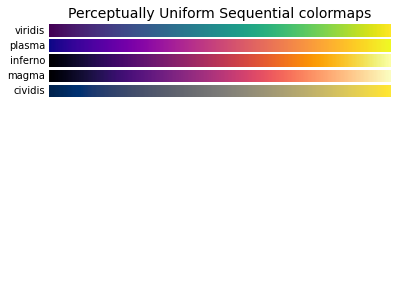

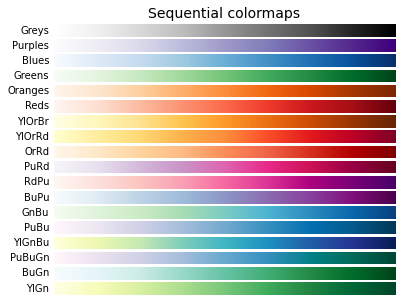

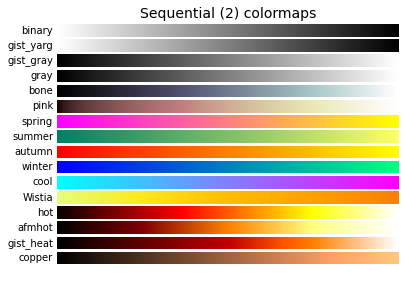

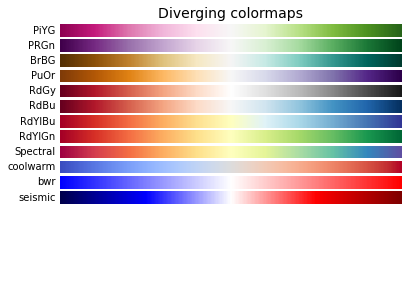

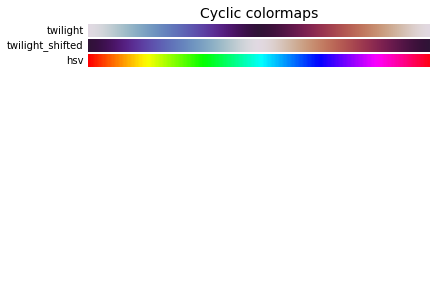

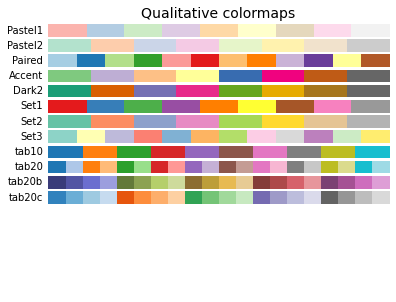

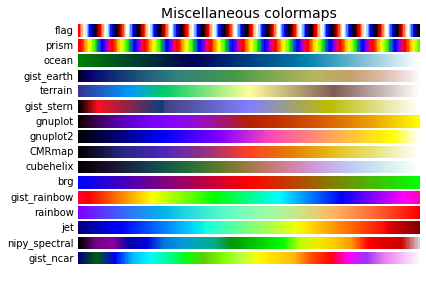

In [157]:
nrows = max(len(cmap_list) for cmap_category, cmap_list in cmaps.items())
gradient = np.linspace(0, 1, 256)
gradient = np.vstack((gradient, gradient))


def plot_color_gradients(cmap_category, cmap_list, nrows):
    fig, axes = plt.subplots(nrows=nrows)
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    axes[0].set_title(cmap_category + ' colormaps', fontsize=14)

    for ax, name in zip(axes, cmap_list):
        ax.imshow(gradient, aspect='auto', cmap=plt.get_cmap(name))
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, name, va='center', ha='right', fontsize=10)

    # Turn off *all* ticks & spines, not just the ones with colormaps.
    for ax in axes:
        ax.set_axis_off()


for cmap_category, cmap_list in cmaps.items():
    plot_color_gradients(cmap_category, cmap_list, nrows)

plt.show()